In [1]:
library(ggplot2)
library(data.table)
library(viridis)
library(dplyr)
library(RColorBrewer)
library(scales)

library(egg)
library(grid)

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Metadata color schemes:
https://docs.google.com/document/d/1aoHiYCidordBpsvrk81forVNbjq4PPanLEfFkQs2knA/edit


# Load megagut metadata

In [2]:
# Metadata from Amanda, cells
meta = fread("/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/MUC6_SI_AP_pooledhealthydisease_meta.csv")

In [3]:
dim(meta)

[1] 298 138

In [4]:
colnames(meta)

[1] "index"                              
  [2] "latent_cell_probability"            
  [3] "latent_RT_efficiency"               
  [4] "cecilia22_predH"                    
  [5] "cecilia22_predH_prob"               
  [6] "cecilia22_predH_uncertain"          
  [7] "cecilia22_predL"                    
  [8] "cecilia22_predL_prob"               
  [9] "cecilia22_predL_uncertain"          
 [10] "elmentaite21_pred"                  
 [11] "elmentaite21_pred_prob"             
 [12] "elmentaite21_pred_uncertain"        
 [13] "suo22_pred"                         
 [14] "suo22_pred_prob"                    
 [15] "suo22_pred_uncertain"               
 [16] "n_counts"                           
 [17] "log1p_n_counts"                     
 [18] "n_genes"                            
 [19] "log1p_n_genes"                      
 [20] "percent_mito"                       
 [21] "n_counts_mito"                      
 [22] "percent_ribo"                       
 [23] "n_counts_ribo"                      
 [24] "percent_hb"                         
 [25] "n_counts_hb"                        
 [26] "percent_top50"                      
 [27] "n_counts_raw"                       
 [28] "log1p_n_counts_raw"                 
 [29] "n_genes_raw"                        
 [30] "log1p_n_genes_raw"                  
 [31] "percent_mito_raw"                   
 [32] "n_counts_mito_raw"                  
 [33] "percent_ribo_raw"                   
 [34] "n_counts_ribo_raw"                  
 [35] "percent_hb_raw"                     
 [36] "n_counts_hb_raw"                    
 [37] "percent_top50_raw"                  
 [38] "n_counts_spliced"                   
 [39] "log1p_n_counts_spliced"             
 [40] "n_genes_spliced"                    
 [41] "log1p_n_genes_spliced"              
 [42] "percent_mito_spliced"               
 [43] "n_counts_mito_spliced"              
 [44] "percent_ribo_spliced"               
 [45] "n_counts_ribo_spliced"              
 [46] "percent_hb_spliced"                 
 [47] "n_counts_hb_spliced"                
 [48] "percent_top50_spliced"              
 [49] "n_counts_unspliced"                 
 [50] "log1p_n_counts_unspliced"           
 [51] "n_genes_unspliced"                  
 [52] "log1p_n_genes_unspliced"            
 [53] "percent_mito_unspliced"             
 [54] "n_counts_mito_unspliced"            
 [55] "percent_ribo_unspliced"             
 [56] "n_counts_ribo_unspliced"            
 [57] "percent_hb_unspliced"               
 [58] "n_counts_hb_unspliced"              
 [59] "percent_top50_unspliced"            
 [60] "percent_soup"                       
 [61] "percent_spliced"                    
 [62] "qc_cluster"                         
 [63] "pass_auto_filter_mito20"            
 [64] "good_qc_cluster_mito20"             
 [65] "pass_auto_filter_mito50"            
 [66] "good_qc_cluster_mito50"             
 [67] "pass_auto_filter_mito80"            
 [68] "good_qc_cluster_mito80"             
 [69] "pass_auto_filter"                   
 [70] "good_qc_cluster"                    
 [71] "pass_default"                       
 [72] "sampleID"                           
 [73] "sourceID"                           
 [74] "donorID_original"                   
 [75] "study"                              
 [76] "donorID_corrected"                  
 [77] "donorID_unified"                    
 [78] "donor_category"                     
 [79] "donor_disease"                      
 [80] "organ_original"                     
 [81] "organ_unified"                      
 [82] "organ_broad"                        
 [83] "age_original"                       
 [84] "age_unified"                        
 [85] "age_continuousadult"                
 [86] "age_continuousdev"                  
 [87] "sex"                                
 [88] "sample_type"                        
 [89] "sample_category"                    
 [90] "sample_retrieval"                   
 [91] "tissue_fraction"                   

In [5]:
# Subset data frame for columns to visualize
select_columns = c("index", "disease", "organ_unified", "study", "donorID_unified", "age_unified")
meta_sub = meta[, ..select_columns]  # .. is data.table expansion of variable 

In [6]:
head(meta_sub)

index,disease,organ_unified,study,donorID_unified,age_unified
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACACTGACAGGGCATA-Human_colon_16S8000487,control,duodenum,Elmentaite2021,D11,55-74
CATTATCTCTTGCCGT-Human_colon_16S8000487,control,duodenum,Elmentaite2021,D11,55-74
CCTTCGAGTTGGTTTG-Human_colon_16S8000487,control,duodenum,Elmentaite2021,D11,55-74
CGACTTCCAAGCCGCT-Human_colon_16S8000487,control,duodenum,Elmentaite2021,D11,55-74
CGGCTAGGTTGACGTT-Human_colon_16S8000487,control,duodenum,Elmentaite2021,D11,55-74
CTGCCTAAGCAGCGTA-Human_colon_16S8000487,control,duodenum,Elmentaite2021,D11,55-74


In [7]:
#sort(table(meta_sub$disease))

In [8]:
#sort(table(meta_sub$organ_unified))

In [9]:
#sort(table(meta_sub$study))

# Count cells and donors per condition
Condition: disease x organ_unified x study

In [10]:
# Count cells per group in selected features of meta_sub
#d_counts = aggregate(index~disease + organ_unified + study + donorID_unified + age_unified, data=d, FUN=length)
d_cell_counts = aggregate(index~., data=meta_sub, FUN=length)

setnames(d_cell_counts, "index", "n_cells")  # rename cell counts column

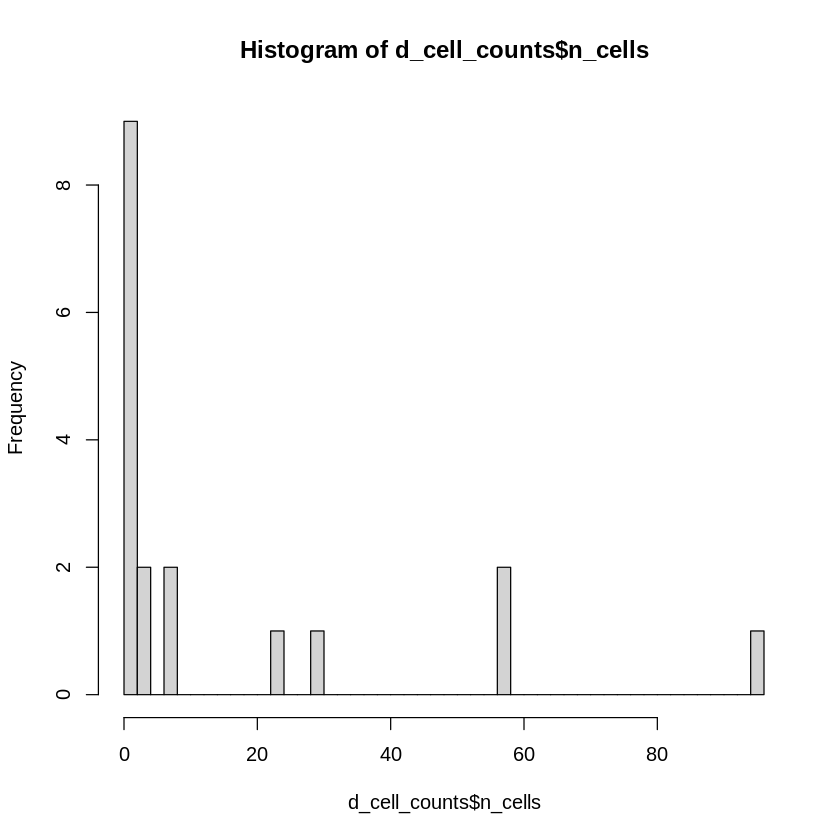

In [11]:
hist(d_cell_counts$n_cells, breaks=50)

In [12]:
head(d_cell_counts)

,disease,organ_unified,study,donorID_unified,age_unified,n_cells
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,control,duodenum,Fitzpatrick2023,D160,,2
2,celiac_active,duodenum,Fitzpatrick2023,D161,,1
3,celiac_treated,duodenum,Fitzpatrick2023,D163,,1
4,celiac_active,duodenum,Fitzpatrick2023,D164,,23
5,crohns_disease,ileum,Martin2019,D41,,1
6,crohns_disease,ileum,Martin2019,D42,,4


In [13]:
# Count donor sample sizes per condition (organ x study x disease)
d_donor_counts = aggregate(donorID_unified ~ disease + organ_unified + study, data=d_cell_counts, FUN=length)

setnames(d_donor_counts, "donorID_unified", "n_donor")

In [14]:
# Sum cell count per organ x study x disease
d_condition = aggregate(n_cells ~ disease + organ_unified + study, data=d_cell_counts, FUN=sum)

In [15]:
# Collect cell and donor counts per organ x study x disease
d_condition = merge(d_donor_counts, d_condition)
head(d_condition)

,disease,organ_unified,study,n_donor,n_cells
,<chr>,<chr>,<chr>,<int>,<int>
1,celiac_active,duodenum,Fitzpatrick2023,2,24
2,celiac_treated,duodenum,Fitzpatrick2023,1,1
3,control,duodenum,Elmentaite2021,2,61
4,control,duodenum,Fitzpatrick2023,1,2
5,control,duodenum,Yu2021,1,8
6,control,ileum,Elmentaite2021,1,1


# Plot tabular counts

In [16]:
unique(meta_sub$organ_unified)

[1] "duodenum" "jejunum"  "ileum"

In [17]:
unique(meta_sub$disease)

[1] "control"                "pediatric_IBD"          "crohns_disease"        
[4] "neighbouring_inflammed" "celiac_active"          "celiac_treated"

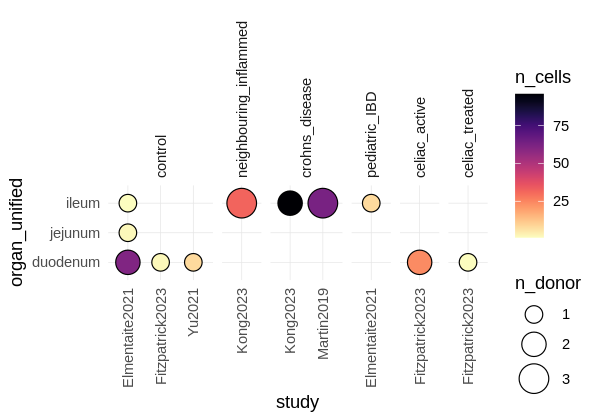

In [24]:
# Dotplot  of cell counts and donor counts per organ x study x disease
width = 5
height = 3.5
options(repr.plot.width=width, repr.plot.height=height)

# Copy
d = d_condition

# Color schemes

# Organ colors used for UMAPs
# organ_colors = c(
#     'periodontium'='#f4e7e7',
#     'gingival mucosa'='#eedbdb',
#     'buccal mucosa'='#e3c9c9',
#     'salivary gland'='#cecbcb',
#     'oesophagus'='#f9d4a7',
#     'stomach'='#edb75f',
#     'duodenum'='#fec8c1',
#     'jejunum'='#feb2a8',
#     'ileum'='#fc9a8d',
#     'appendix'='#debcb4',
#     'caecum'='#deb0a4',
#     'ascending colon'='#cf9686',
#     'transverse colon'='#bd7c68',
#     'descending colon'='#a36352',
#     'sigmoid colon'='#874533',
#     'rectum'='#522e25',
#     'small intestine'='#f5a59a',
#     'intestine'='#db948a',
#     'colon'='#c28e80',
#     'MLN'='#ffeb7a'
# )

# Grouped colors
organ_colors = c(
    'periodontium'= '#eedbdb',
    'gingival mucosa'= '#eedbdb',
    'buccal mucosa'= '#eedbdb',
    'salivary gland'= '#cecbcb',
    'oesophagus'= '#f9d4a7',
    'stomach'= '#edb75f',
    'duodenum'= '#feb2a8',
    'jejunum'= '#feb2a8',
    'ileum'= '#feb2a8',
    'small intestine'= '#feb2a8',
    'appendix'= '#a36352',
    'caecum'= '#a36352',
    'ascending colon'= '#a36352',
    'transverse colon'= '#a36352',
    'descending colon'= '#a36352',
    'sigmoid colon'= '#a36352',
    'rectum'= '#a36352',
    'colon'= '#a36352',
    'intestine'= '#db948a',
    'MLN'= '#ffeb7a'
)

# # Organ order based on megagut metadata document
# organ_order = rev(c(                               
#     'periodontium',
#     'gingival mucosa',
#     'buccal mucosa',
#     'salivary gland',
#     'oesophagus',
#     'stomach',
#     'duodenum',
#     'jejunum',
#     'ileum',
#     'appendix',
#     'caecum',
#     'ascending colon',
#     'transverse colon',
#     'descending colon',
#     'sigmoid colon',
#     'rectum',
#     'small intestine',
#     'intestine',
#     'colon',
#     'MLN'
# ))

# Reordered organs, by Amanda. Reverse order
organ_order = c(
    'periodontium',
    'gingival mucosa',
    'buccal mucosa',
    'salivary gland',
    'oesophagus',
    'stomach',
    'duodenum',
    'jejunum',
    'ileum',
    'small intestine',
    'appendix',
    'caecum',
    'ascending colon',
    'transverse colon',
    'descending colon',
    'sigmoid colon',
    'rectum',
    'colon',
    'intestine',
    'MLN'
)

# Match organ colors
organ_colors = organ_colors[match(names(organ_colors), organ_order)]

# Reorder organ levels
d$organ_unified = factor(
    d_condition$organ_unified,
    levels=organ_order
)

# Plot order for disease conditions by number of entries
#diseases = names(sort(table(d_condition$disease), decreasing=TRUE))

# diseases_order = c(
#     'control',
#     'inutero',
#     'preterm',
#     'crohns_disease',
#     'ulcerative_colitis',
#     'pediatric_IBD',                               
#     'neighbouring_inflammed',
#     'neighbouring_polyps',
#     'celiac_active',
#     'celiac_treated',
#     'cancer_colorectal',
#     'cancer_gastric',
#     'neighbouring_cancer'
# )

# Disease order with adjacent
diseases_order = c(
    'control',
    'neighbouring_inflammed',
    'neighbouring_polyps',
    'neighbouring_cancer',
    'inutero',
    'preterm',
    'crohns_disease',
    'ulcerative_colitis',
    'pediatric_IBD',                               
    'celiac_active',
    'celiac_treated',
    'cancer_colorectal',
    'cancer_gastric'
)

d$disease = factor(d_condition$disease, levels=diseases_order)

# dotplot
g = ggplot(d, aes(x=study, y=organ_unified, size=n_donor, fill=n_cells)) +
    # Facets grid per disease condition, starting with controls 
    facet_grid(~disease,
               scales="free_x",
               space="free_x",
               #switch="x"
              ) +  # free_x drops empty columns, free_x scales x dimensions to number of entries

    # Points
    geom_point(pch=21) +

    # Scales
    #scale_color_gradientn(colors=turbo(20)) +
    scale_fill_gradientn(colors=rev(magma(20))) +
    scale_size_area(max_size=8, breaks=c(1, 2, 3, 4, 5, 10, 15, 20)) +
    
    # Style
    coord_cartesian(clip="off") +  # allow plotting outside bounding box, preventing clipping
    theme_minimal() +
    theme(
        # Vertical x labels
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
        
        # Horizontal labels
        axis.text.y = element_text(
            #color=organ_colors
        ),
        
        # Vertical facets labels
        strip.text.x = element_text(angle=90, hjust=0),
        
        # Grid style
        panel.grid.major = element_line(
            color="grey90",
            linewidth=0.2
        ),
#         panel.grid.major.x = element_line(
#             color=alpha("grey80", 0.5),
#         ),
#         panel.grid.major.y = element_line(
#             color=alpha(organ_colors, 0.5),
#         ),
        panel.grid.minor = element_blank()  # no minor grid
    )
    

# # Shared organ color legend annotation across facets groups
# color_legend = ggplot(data.frame(id=1:length(organ_colors), group=names(organ_colors)), aes(y = id, x = 0, col=group)) +
#     geom_point(shape = 15, size = 5, show.legend = FALSE) + 
#     theme_classic() +
#     scale_color_manual(values=alpha(organ_colors, 1.0)) +
#     theme(
#         axis.title = element_blank(), axis.line = element_blank(), 
#         axis.text = element_blank(), axis.ticks = element_blank(), 
#         plot.margin = unit(c(0, 0, 0, 0), "cm"))

g

# + annotation_custom(ggplotGrob(color_legend),
#     xmin = 0,
#     xmax = 0, 
#     ymin = -0.2,
#     ymax = length(organ_order) + 1
# )

#g

ggsave("plots/megagut_metadata_visual_overview_MUC6_v2.pdf", width=width, height=height)